<a target="_blank" href="https://colab.research.google.com/github/IU-Atmospheric-Sciences-Group/teaching_demos/blob/main/Exploring_Maximum_Likelihood.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exploring Maximum Likelihood

This notebook demonstrates maximum likelihood in a graphical way.  It is designed to be used by an instructor as a tool to help explain the concepts of likelihood and optimization.

In [1]:
# install ipywidgets so we can have interactive plots
!pip install ipywidgets==8.0.6

In [2]:
# import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import scipy.stats

# set some colors
iu_crimson = "#990000"

In [3]:
""" Define a function to plot a PDF with data, for use in an interactive plot"""
# define a 'dataset' with three points
x = np.array([5.4, 6.8, 4.5])

def update_plot(mu, sigma):
  """ Updates a plot of data an a normal distribution given a mean and standard deviation.

  Args:
    mu: the mean of the normal distribution
    sigma: the standard deviation of the normal distribution

  """
  fig, ax = plt.subplots()

  # plot the three data points
  ax.scatter(x, np.zeros_like(x), color = iu_crimson, label = "data")

  # plot a normal distribution with mu and sigma from the function call
  x_plot = np.linspace(0, 10, 100)
  pdf = scipy.stats.norm.pdf(x_plot, loc = mu, scale = sigma)
  ax.plot(x_plot, pdf, color = "black", label = "PDF")


  # initialize the likelihood
  likelihood = 1

  # draw dashed lines from the x points up to the PDF
  for i in range(len(x)):
    pdf_x = scipy.stats.norm.pdf(x[i], loc = mu, scale = sigma)
    likelihood *= pdf_x
    ax.plot([x[i], x[i]], [0, pdf_x], linestyle = "--", color = iu_crimson)
    ax.scatter(x[i], pdf_x, color = iu_crimson)

  # print the likelihood in the title
  ax.set_title(f"Likelihood: {likelihood:.3g}")

  # add a legend
  ax.legend(loc = "upper right")

  # label axes
  ax.set_xlabel("Data (x)")
  ax.set_ylabel("Probability Density")

  # turn on a coarse and fine grid, with the fine grid
  # having a spacing of 0.5 in x and 0.1 in y
  ax.grid(True, which = "both", alpha = 0.2)
  ax.grid(True, which = "minor", alpha = 0.2)
  ax.set_xticks(np.arange(0, 11, 1))
  ax.set_yticks(np.arange(0, 1.1, 0.05))

  # set plot limits so that the plot doesn't move around
  # everytime it is refreshed
  ax.set_xlim(0, 10)
  ax.set_ylim(0, 1)

  # draw the plot
  plt.show()

# test the function
#update_plot(5, 1)

The following interactive plot shows the effect of adjusting the parameters $\mu$ and $\sigma$ in the following statistical model:

$$ P(x~|~\mu,\sigma) = \mathcal{N}(x | \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2/(2\sigma^2)}$$

It shows the likelihood given by

$$ \mathcal{L}(\mu, \sigma ~|~ x) = \prod\limits_{i = 1}^{N} P(x_i~|~\mu,\sigma)$$

In [4]:
# create sliders for mu and sigma
mu_slider = widgets.FloatSlider(min = 0, max = 10, step = 0.05, value = 3, description = "mu")
sigma_slider = widgets.FloatSlider(min = 0.1, max = 10, step = 0.05, value = 2, description = "sigma")

# use interact to link the sliders to the update_plot function
widgets.interact(update_plot, mu = mu_slider, sigma = sigma_slider)

interactive(children=(FloatSlider(value=3.0, description='mu', max=10.0, step=0.05), FloatSlider(value=2.0, de…

<function __main__.update_plot(mu, sigma)>

In [5]:
# calculate & print the mean and standard deviation of the data
mean_x = np.mean(x)
std_x = np.std(x)
print(f"Mean: {mean_x:.3g}")
print(f"Standard Deviation: {std_x:.3g}")

Mean: 5.57
Standard Deviation: 0.946


# Maximum Likelihood and Linear Regression

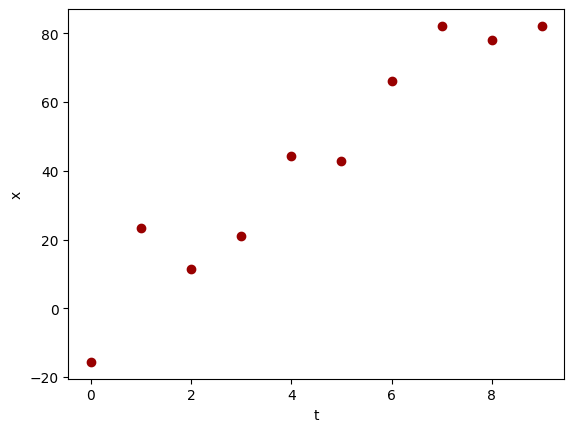

In [6]:
""" Define a dataset with a positive slope. """

t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
slope = 10
intercept = 0
x =  slope*t + intercept + np.random.normal(loc = 0, scale = 10, size = len(t))

# plot a scatter plot of the data
fig, ax = plt.subplots()
ax.scatter(t, x, color = iu_crimson)
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.show()

In [7]:
""" Write a function for an interactive 3D plot. """

def update_plot_3d(slope, intercept, sigma):
  """ Updates a 3D plot of data and a line given a slope and intercept.

  Args:
    slope: the slope of the line
    intercept: the intercept of the line
    sigma: the standard deviation of the noise

  """
  fig = plt.figure()
  ax = fig.add_subplot(projection = "3d")

  # plot the data on the x-y plane
  ax.scatter(t, x, np.zeros_like(t), color = iu_crimson, label = "data")

  # draw the line
  x_plot = np.linspace(0, 10, 100)
  y_plot = slope*x_plot + intercept
  ax.plot(x_plot, y_plot, np.zeros_like(x_plot), linestyle = '--', color = "black", label = "line")

  # initialize the likelihood
  likelihood = 1

  # draw normal PDFs centered on the line for each data point
  for i in range(len(t)):
    x_pdf = np.linspace(0, 100, 200)
    mu_pdf = slope*t[i] + intercept
    pdf = scipy.stats.norm.pdf(x_pdf, loc = mu_pdf, scale = sigma)

    # draw the PDF
    if i == 0:
      label = "PDF"
    else:
      label = None
    ax.plot(t[i]*np.ones_like(x_pdf), x_pdf, pdf, color = "black", alpha = 0.5, label = label)

    # draw a line from the point up to the pdf
    pdf_x = scipy.stats.norm.pdf(x[i], loc = mu_pdf, scale = sigma)
    ax.plot([t[i], t[i]], [x[i], x[i]], [0, pdf_x], linestyle = "--", color = iu_crimson)

    # plot the point on the line
    ax.scatter(t[i], x[i], pdf_x, color = iu_crimson, alpha = 0.5)

    # update the likelihood
    likelihood *= pdf_x

  # print the likelihood in the title
  ax.set_title(f"Likelihood: {likelihood:.3g}")

  # add a legend
  ax.legend(loc = "upper right")

  # set plot labels
  ax.set_xlabel("t")
  ax.set_ylabel("x")
  ax.set_zlabel("Probability Density")

  # set plot limits
  ax.set_xlim(0, 10)
  ax.set_ylim(0, 100)
  ax.set_zlim(0, 0.1)

  # make sure the plot doesn't cut off axis labels
  ax.set_box_aspect(None, zoom=0.8)

  # draw the plot
  plt.show()


# test the function
#update_plot_3d(10, 0, 5)


The following interactive plot shows the effect of adjusting the parameters $m$ (slope), $b$ (intercept), and $\sigma$ in the following statistical model:

$$ P(x,t~|~m,b,\sigma) = \mathcal{N}(x | m \cdot t, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-(m \cdot t+b))^2/(2\sigma^2)}$$

It shows the likelihood given by

$$ \mathcal{L}(m,b, \sigma ~|~ x,t) = \prod\limits_{i = 1}^{N} P(x_i, t_i~|~m,b,\sigma)$$

In [8]:
""" Create sliders for the slope, intercept, and standard deviation. """
slope_slider = widgets.FloatSlider(min = -30, max = 30, step = 0.5, value = 0, description = "slope")
intercept_slider = widgets.FloatSlider(min = -10, max = 100, step = 0.05, value = 50, description = "intercept")
sigma_slider = widgets.FloatSlider(min = 0.1, max = 100, step = 0.05, value = 10, description = "sigma")

# use interact to link the sliders to the update_plot_3d function
widgets.interact(update_plot_3d, slope = slope_slider, intercept = intercept_slider, sigma = sigma_slider)

interactive(children=(FloatSlider(value=0.0, description='slope', max=30.0, min=-30.0, step=0.5), FloatSlider(…

<function __main__.update_plot_3d(slope, intercept, sigma)>